In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [3]:
df = pd.read_csv(r"C:\Users\Ahmed\Downloads\supermarket_sales -.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [5]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

In [16]:
X = df.drop('Customer type', axis=1)  # x= كل العواميد ماعدا العمود اللي بنعمل تصنيف معاه
y = df['Customer type']
y

0      Member
1      Normal
2      Normal
3      Member
4      Normal
        ...  
995    Normal
996    Normal
997    Member
998    Normal
999    Member
Name: Customer type, Length: 1000, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

X_encoded = X.copy()

X_encoded = X_encoded.drop('Invoice ID', axis=1)

le = LabelEncoder()
for col in X_encoded.columns:
    if X_encoded[col].dtype == 'object':
        X_encoded[col] = le.fit_transform(X_encoded[col])


In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Training Is : {len(X_train)}")
print(f"Validation Is : {len(X_val)}")
print(f"Test Is : {len(X_test)}")

Training Is : 600
Validation Is : 200
Test Is : 200


In [ ]:
#KNN
k_values = range(1, 21)
val_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    val_score = knn.score(X_val, y_val)
    val_scores.append(val_score)

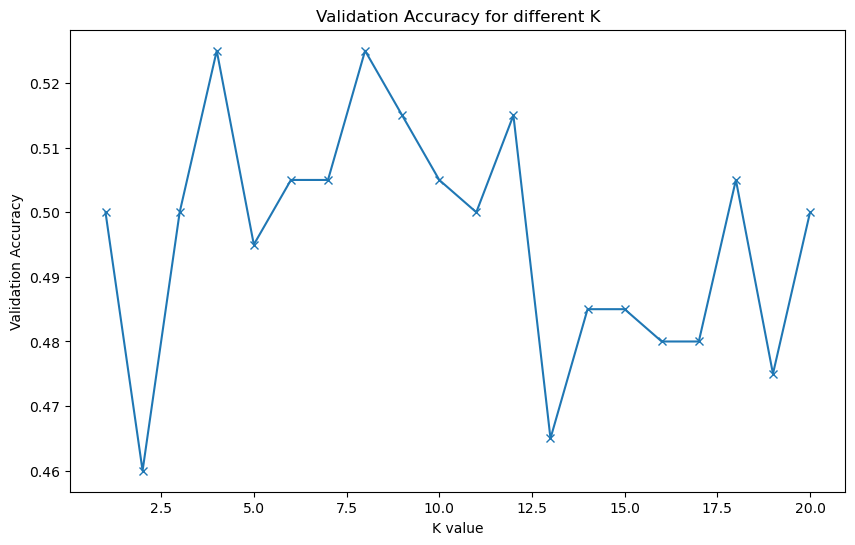

In [24]:
plt.figure(figsize=(10,6))
plt.plot(k_values, val_scores, marker='x')
plt.xlabel('K value')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy for different K')
plt.show()

In [27]:
best_k = k_values[np.argmax(val_scores)]
print(f"Best K: {best_k}")

Best K: 4


In [28]:
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

In [30]:
# Accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {test_accuracy}")

Test Set Accuracy: 0.445


In [36]:
# 6. Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=best_k), X_train, y_train, cv=kf)

print(f"Cross-validation mean accuracy: {cv_scores}")
print(f"Cross-validation mean accuracy: {cv_scores.mean()}")

Cross-validation mean accuracy: [0.53333333 0.54166667 0.53333333 0.48333333 0.60833333]
Cross-validation mean accuracy: 0.54


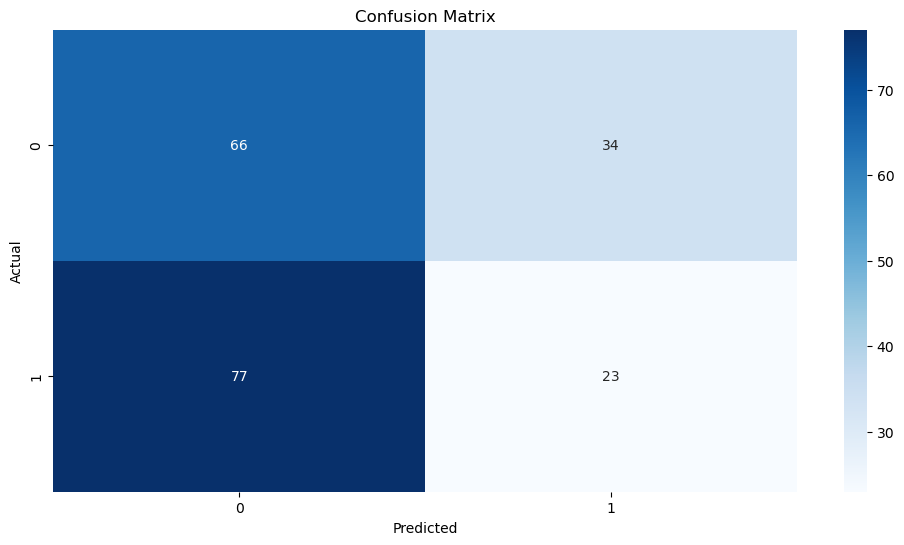

In [43]:
# 7. Confusion Matrix 
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [44]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

      Member       0.46      0.66      0.54       100
      Normal       0.40      0.23      0.29       100

    accuracy                           0.45       200
   macro avg       0.43      0.45      0.42       200
weighted avg       0.43      0.45      0.42       200

